<a href="https://colab.research.google.com/github/alcome1614/proj_num/blob/main/23_01_2024_prof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#library imports
import numpy as np
import matplotlib.pyplot as plt

# Reminder of the Verlet method scheme

$$x(t+s) = 2x(t) - x(t-s) + s^2 a(t)$$

$$x(t) = 2x(t-s) - x(t-2s) + s^2 a(t-s)$$

In order to compute the velocity we use:

$$ v(t) = \dfrac{x(t+s)-x(t-s)}{2s}$$

Notice that we need a point in the timestep $t+s$ to compute the velocity at $t$ ($v(t)$).

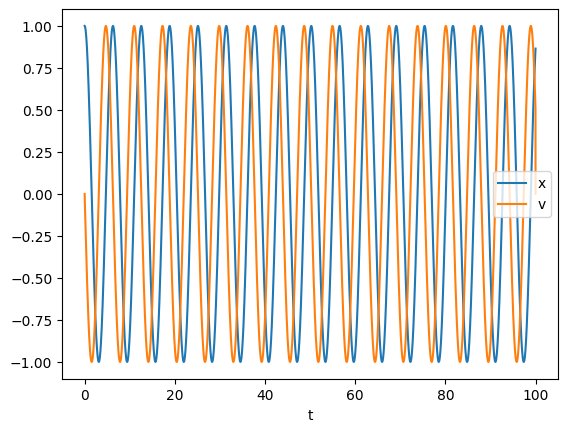

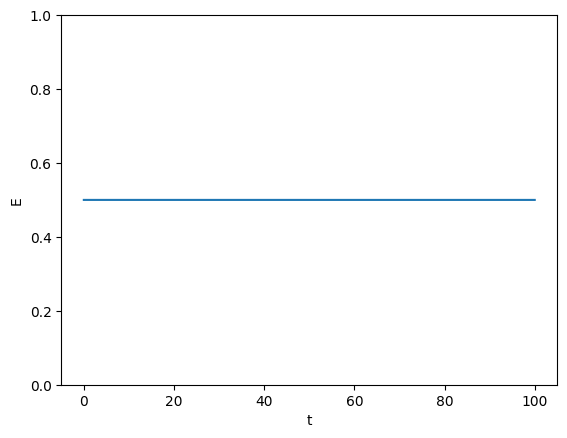

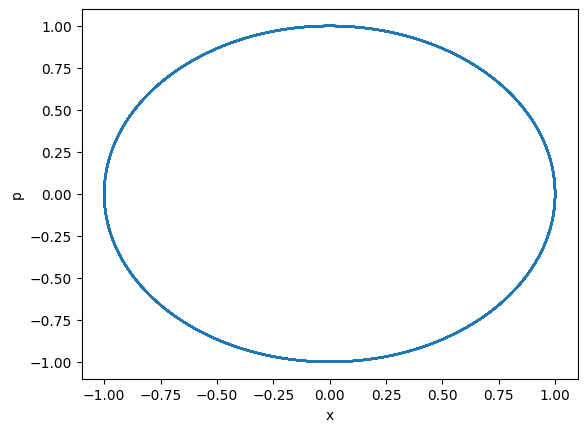

In [ ]:
#Model parameters
k = 1
m = 1

#Integration parameters
N_steps = 10000
dt = 0.01

#Initialization of variables
t = np.zeros(N_steps+2)
x = np.zeros(N_steps+2)
v = np.zeros(N_steps+2)
a = np.zeros(N_steps+2)
E = np.zeros(N_steps+2)

#Initial conditions
x[1] = 1
v[1] = 0
x[0] = x[1] - v[1]*dt
E[1] = 0.5*v[1]**2 + 0.5*x[1]**2

#Integration steps
for i_t in range(2,N_steps+2):
  a[i_t-1] = - k/m* x[i_t-1]
  t[i_t] = t[i_t-1] + dt
  x[i_t] = 2*x[i_t-1] - x[i_t -2] + dt**2 * a[i_t-1]

for i_t in range(2,N_steps+1):
  v[i_t] = (x[i_t+1] - x[i_t-1])/(2*dt)
  E[i_t] = 0.5*v[i_t]**2 + 0.5*x[i_t]**2

#Plotting
plt.plot(t,x, label="x")
plt.plot(t,v, label="v")
# plt.ylabel("x")
plt.xlabel("t")
plt.legend()
plt.show()

plt.plot(t[1:-1],E[1:-1])
plt.ylabel("E")
plt.xlabel("t")
plt.ylim(bottom=0, top=1)
plt.show()

plt.plot(x[1:-1],m*v[1:-1])
plt.xlabel("x")
plt.ylabel("p")
plt.show()

# Problem of two masses

In this case the energy can be written as follows:

$$E(t) = \dfrac{1}{2} m_1 v_1^2(t) +  \dfrac{1}{2} m_2 v_2^2(t) + \dfrac{1}{2}k (x_1(t) - x_2(t))^2$$

And the forces:

$$
\begin{eqnarray}
F_1 & = &  - k (x_1 - x_2) \\
F_2 & = &  - k (x_2 - x_1)
\end{eqnarray}
$$

and therefore the accelerations:

$$
\begin{eqnarray}
a_1(x_1, x_2) & = & \dfrac{d^2x_1}{dt^2} & = & - \dfrac{k}{m_1} (x_1(t) - x_2(t)) \\
a_2(x_1, x_2) & = & \dfrac{d^2x_2}{dt^2} & = & - \dfrac{k}{m_2} (x_2(t) - x_1(t))
\end{eqnarray}
$$

We need to add new variables to describe the new body/mass and modify the force (and thus the acceleration).



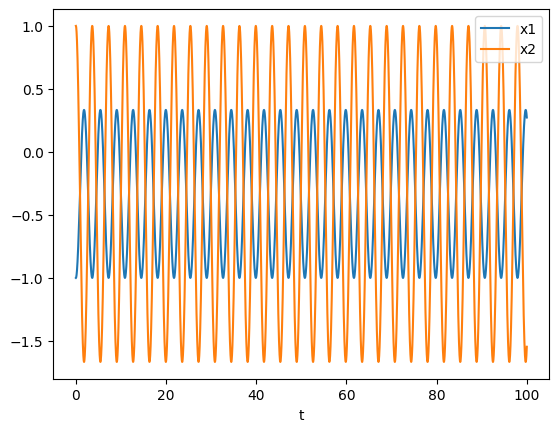

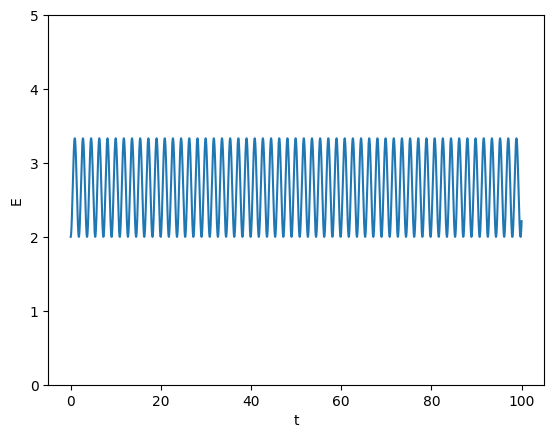

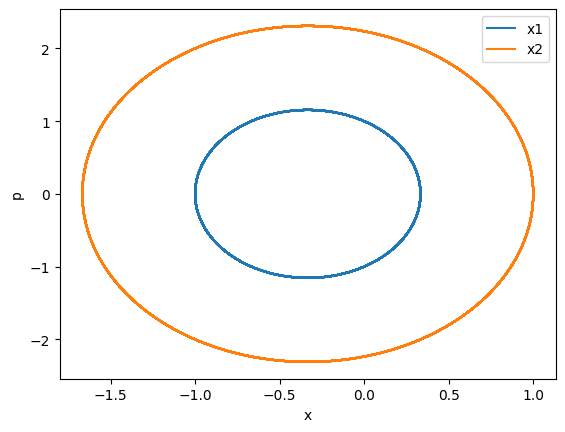

In [ ]:
#Model parameters
k1 = 1
k2 = 2
m1 = 1
m2 = 1

#Integration parameters
N_steps = 10000
dt = 0.01

#Initialization of variables
t = np.zeros(N_steps+2)
x1 = np.zeros((N_steps+2))
x2 = np.zeros((N_steps+2))
v1 = np.zeros((N_steps+2))
v2 = np.zeros((N_steps+2))
a1 = np.zeros((N_steps+2))
a2 = np.zeros((N_steps+2))
E = np.zeros((N_steps+2))

#Initial conditions
x1[1] = -1
x2[1] = 1
v1[1] = 0
v2[1] = 0
x1[0] = x1[1] - v1[1]*dt
x2[0] = x2[1] - v2[1]*dt
E[1] =  0.5*v1[1]**2 + 0.5*v2[1]**2 + 0.5*(x1[1]- x2[1])**2

#Integration steps
for i_t in range(2,N_steps+2):
  t[i_t] = t[i_t-1] + dt
  a1[i_t-1] = - k1/m1* (x1[i_t-1]-x2[i_t-1])
  x1[i_t] = 2*x1[i_t-1] - x1[i_t -2] + dt**2 * a1[i_t-1]
  a2[i_t-1] = - k2/m2* (x2[i_t-1]-x1[i_t-1])
  x2[i_t] = 2*x2[i_t-1] - x2[i_t -2] + dt**2 * a2[i_t-1]

for i_t in range(2,N_steps+1):
  v1[i_t] = (x1[i_t+1] - x1[i_t-1])/(2*dt)
  v2[i_t] = (x2[i_t+1] - x2[i_t-1])/(2*dt)
  E[i_t] =  0.5*v1[i_t]**2 + 0.5*v2[i_t]**2 + 0.5*(x1[i_t]- x2[i_t])**2

#Plotting
plt.plot(t,x1[:], label="x1")
plt.plot(t,x2[:], label="x2")
# plt.ylabel("x")
plt.xlabel("t")
plt.legend()
plt.show()

plt.plot(t[1:-1],E[1:-1])
plt.ylabel("E")
plt.xlabel("t")
plt.ylim(bottom=0, top=5)
plt.show()

plt.plot(x1[1:-1],m1*v1[1:-1], label="x1")
plt.plot(x2[1:-1],m2*v2[1:-1], label="x2")
plt.xlabel("x")
plt.ylabel("p")
plt.legend()
plt.show()

# Dealing with $N$ bodies in a more generic way

If we have $N$ bodies then we would need $N$
Instead of adding new variables we will add a new dimension.

Let's change the code we used for two bodies by instead of using
<code>x1, x2, v1 ,v2</code> each with length <code>(N_steps)</code>,
we willl use <code>x, v</code> with dimensions <code>(N,N_steps)</code>. So when we access <code>x[i,j]</code> the first index <code>i</code> represents the particle/molecule and the second index <code>j</code>.

They can be initialized for example:

<code> x = np.zeros((N,N_steps))</code> (*)


If we had $N=100$ it would be impractical to write:

<code>x1 = np.zeros(N_steps)</code> \\
. \\
. \\
. \\
<code>x100 = np.zeros(N_steps) </code>
That would be 100 lines of code! And that without counting the lines of code to implement verlet.

The way indicated in (*) is 1 line!




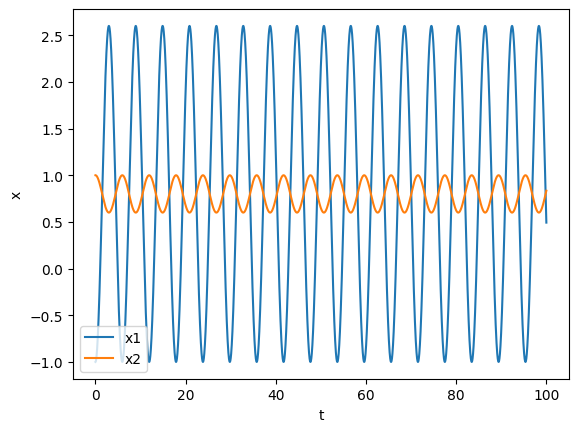

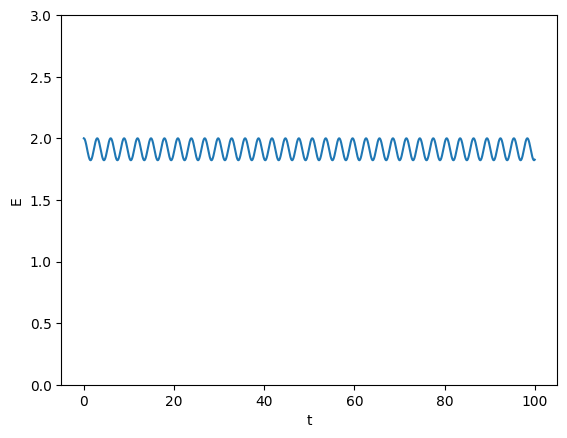

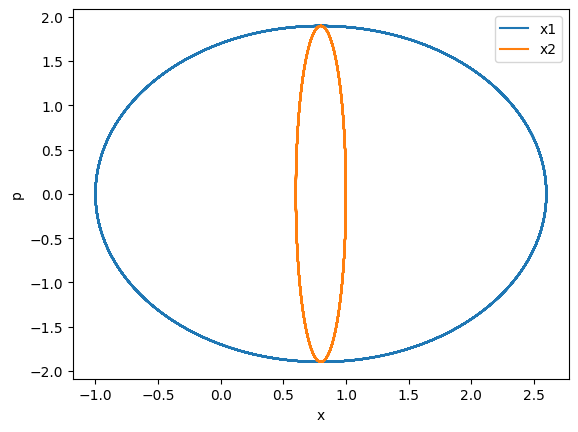

In [ ]:
#Model parameters
k = 1
m = np.array([1,9])

#Integration parameters
N_steps = 10000
dt = 0.01

#Initialization of variables
t = np.zeros(N_steps+2)
x = np.zeros((N_steps+2,2))
v = np.zeros((N_steps+2,2))
a = np.zeros((N_steps+2,2))
E = np.zeros((N_steps+2))

#Initial conditions
x[1] = np.array([-1,1])
v[1] = np.array([0,0])
x[0] = x[1] - v[1]*dt
E[1] =  0.5*v[1, 0]**2 + 0.5*v[1, 1]**2 + 0.5*k*(x[1, 0]- x[1,1])**2

#Integration steps
for i_t in range(2,N_steps+2):
  t[i_t] = t[i_t-1] + dt
  a[i_t-1, 0] = - k/m[0]* (x[i_t-1,0]-x[i_t-1,1])
  x[i_t, 0] = 2*x[i_t-1, 0] - x[i_t -2, 0] + dt**2 * a[i_t-1, 0]
  a[i_t-1, 1] = - k/m[1]* (x[i_t-1,1]-x[i_t-1,0])
  x[i_t, 1] = 2*x[i_t-1, 1] - x[i_t -2, 1] + dt**2 * a[i_t-1, 1]

for i_t in range(2,N_steps+1):
  v[i_t, 0] = (x[i_t+1, 0] - x[i_t-1, 0])/(2*dt)
  v[i_t, 1] = (x[i_t+1, 1] - x[i_t-1, 1])/(2*dt)
  E[i_t] =  0.5*v[i_t, 0]**2 + 0.5*v[i_t, 1]**2 + 0.5*k*(x[i_t, 0]- x[i_t,1])**2

#Plotting
plt.plot(t,x[:,0], label="x1")
plt.plot(t,x[:,1], label="x2")
plt.ylabel("x")
plt.xlabel("t")
plt.legend()
plt.show()

plt.plot(t[1:-1],E[1:-1])
plt.ylabel("E")
plt.xlabel("t")
plt.ylim(bottom=0, top=3)
plt.show()

plt.plot(x[1:-1,0],m[0]*v[1:-1,0], label="x1")
plt.plot(x[1:-1,1],m[1]*v[1:-1,1], label="x2")
plt.xlabel("x")
plt.ylabel("p")
plt.legend()
plt.show()

# N bodies finally

We are ready to implement a code for $N$ bodies.

In this case the expression for the energy is:

$$
E = \sum_{i=1}^{N} \dfrac{1}{2} m_i v_i^2(t) + \sum_{i\neq j} \dfrac{1}{2} k (x_{}(t) - x_{j}(t))^2
$$

$$ F_i =  - \sum _{j}^{N} k (x_i(t) - x_j(t)) $$


and therefore the accelerations:

$$
a_i(\{x_j\})  = \dfrac{d^2x_i}{dt^2}  = - \dfrac{k}{m_i} \sum_{j=1}^{N} (x_i(t) - x_j(t))
$$

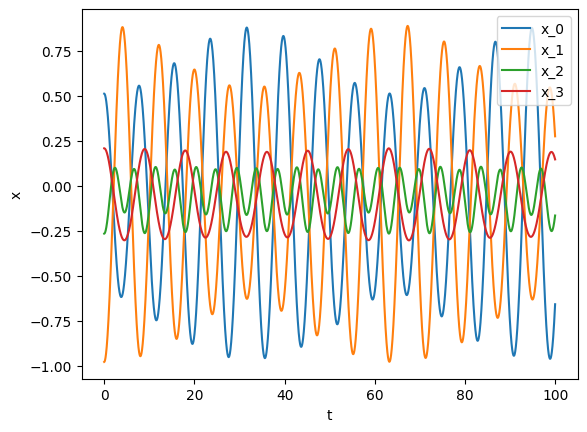

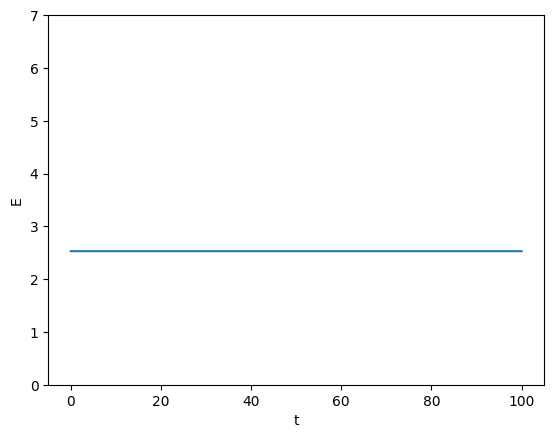

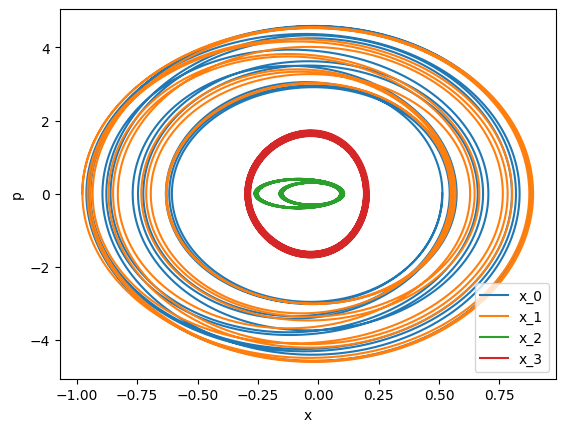

In [ ]:
#Model parameters
N = 4
k = 1
m = 9*np.random.rand(N)+1 #random numbers in [1,10]


#Integration parameters
N_steps = 10000
dt = 0.01

#Initialization of variables
t = np.zeros(N_steps+2)
x = np.zeros((N_steps+2,N))
v = np.zeros((N_steps+2,N))
a = np.zeros((N_steps+2,N))
E = np.zeros((N_steps+2))

#Initial conditions
x[1] = 2*np.random.rand(N)-1 #random positions in the interval [-1,1]
v[1] = np.zeros(N)
x[0] = x[1] - v[1]*dt
for i_n in range(N):
  E[1] +=  0.5*m[i_n]*v[1, i_n]**2 #kinetic
  for j_n in range(i_n,N):
    E[1] += 0.5*k*(x[1,i_n] - x[1,j_n])**2 #potential


#Integration steps
for i_t in range(2,N_steps+2):

  #compute accelerations
  for i_n in range(N):
    for j_n in range(N):
      a[i_t-1, i_n] += -k/m[i_n]*(x[i_t-1,i_n] - x[i_t-1,j_n])
  # if i_t < 10: print(f"i_t-1: {i_t-1} a0:{a[i_t-1,0]} a1:{a[i_t-1,1]}")

  #update position
  t[i_t] = t[i_t-1] + dt
  for i_n in range(N):
    x[i_t, i_n] = 2*x[i_t-1, i_n] - x[i_t -2, i_n] + dt**2 * a[i_t-1, i_n]
#update speed and energy
for i_t in range(2,N_steps+1):
  for i_n in range(N):
    v[i_t, i_n] = (x[i_t+1, i_n] - x[i_t-1, i_n])/(2*dt)
    v[i_t, i_n] = (x[i_t+1, i_n] - x[i_t-1, i_n])/(2*dt)
    E[i_t] +=  0.5*m[i_n]*v[i_t, i_n]**2 #kinetic

    for j_n in range(i_n,N):
      E[i_t] += 0.5*k*(x[i_t,i_n] - x[i_t,j_n])**2 #potential

#Plotting
for i_n in range(N):
  plt.plot(t[1:-1],x[1:-1, i_n], label=f"x_{i_n}")
plt.ylabel("x")
plt.xlabel("t")
plt.legend()
plt.show()

plt.plot(t[1:-1],E[1:-1])
plt.ylabel("E")
plt.xlabel("t")
plt.ylim(bottom=0, top=7)
plt.show()

for i_n in range(N):
  plt.plot(x[1:-1,i_n],m[i_n]*v[1:-1,i_n], label=f"x_{i_n}")
plt.xlabel("x")
plt.ylabel("p")
plt.legend()
plt.show()